# 1. Perkenalan 

1.1 \
Nama : Faiz Kurniawan \
Batch : RMT 018 \
\
1.2 \
Latar Belakang
<p style='text-align: justify;'> Covid-19 adalah penyakit menular yang disebabkan oleh virus SARS-CoV-2. Kebanyakan korban terjangkit akan mengalami gangguan pernafasan, dan akan sembuh dengan sendirinya tanpa penanganan intensif. Namun beberapa korban terjangkit yang memiliki penyakit bawaan seperti gangguan pernafasan, diabetes, atau kanker memiliki kemungkinan besar untuk mengalami sebuah komplikasi yang bisa berujung pada kematian. Cara terbaik mencegah dan menangani Covid-19 adalah dengan mengetahui bagaimana virus menyebar dan melindungi diri dari korban terjangkit lainnya, dan juga melakukan isolasi untuk mencegah terjadinya persebaran lebih lanjut.
 </p>



1.3 \
Problem Statement
<p style='text-align: justify;'> Berdasarkan latar belakang yang ada, peneliti ingin mengetahui data lebih lanjut mengenai Covid-19 di berbagai negara. Data-data seperti jumlah korban terjangkit, jumlah korban meninggal, jumlah korban yang sembuh, jumlah korban yang masih aktif dan persentase jumlah meninggal. Dengan adanya data tersebut, peneliti akan lebih mudah untuk menentukan negara mana saja yang efektif melakukan penanganan covid agar korban terjangkit tidak meninggal dan bisa sembuh. </p>






# 2. Import Pustaka 

In [1176]:
import pandas as pd

# 3. Data Loading

In [1177]:
# SELECT province_state, country_region, date, confirmed, deaths, recovered, active FROM `bigquery-public-data.covid19_jhu_csse.summary`
# Import dataset ke variable df
df = pd.read_csv("E:\DataScience\h8dsft_P0GC1_faiz_kurniawan.csv")
df

,province_state,country_region,date,confirmed,deaths,recovered,active
0,Florida,US,2021-04-07,5240.0,136.0,NaN,NaN
1,Florida,US,2021-04-07,2697.0,45.0,NaN,NaN
2,Florida,US,2021-04-07,39322.0,732.0,NaN,NaN
3,Florida,US,2021-04-07,3268.0,55.0,NaN,NaN
4,Georgia,US,2021-04-07,2261.0,68.0,NaN,NaN
...,...,...,...,...,...,...,...
4131547,Louisiana,US,2020-05-17,84.0,2.0,0.0,82.0
4131548,Iowa,US,2020-05-17,18.0,0.0,0.0,18.0
4131549,Alabama,US,2020-05-17,34.0,1.0,0.0,33.0
4131550,Texas,US,2020-05-17,18.0,0.0,0.0,18.0


In [1178]:
# Menampilkan info dari dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4131552 entries, 0 to 4131551
Data columns (total 7 columns):
 #   Column          Dtype  
---  ------          -----  
 0   province_state  object 
 1   country_region  object 
 2   date            object 
 3   confirmed       float64
 4   deaths          float64
 5   recovered       float64
 6   active          float64
dtypes: float64(4), object(3)
memory usage: 220.6+ MB


In [1179]:
# Menampilkan deskripsi dari dataset
df.describe()

,confirmed,deaths,recovered,active
count,4.131533e+06,4.131110e+06,1.435591e+06,1.427512e+06
mean,7.123718e+04,1.004514e+03,1.636175e+04,6.556527e+03
std,5.642347e+05,6.253519e+03,1.341763e+05,9.286123e+04
min,-3.028440e+05,-1.780000e+02,-8.544050e+05,-6.298082e+06
25%,7.610000e+02,1.000000e+01,0.000000e+00,5.500000e+01
50%,3.578000e+03,5.600000e+01,0.000000e+00,4.710000e+02
75%,1.546200e+04,2.160000e+02,0.000000e+00,2.248000e+03
max,3.849501e+07,6.246410e+05,6.399531e+06,1.087776e+07


In [1180]:
# Menampilkan 5 data teratas dari dataset
df.head()

,province_state,country_region,date,confirmed,deaths,recovered,active
0,Florida,US,2021-04-07,5240.0,136.0,NaN,NaN
1,Florida,US,2021-04-07,2697.0,45.0,NaN,NaN
2,Florida,US,2021-04-07,39322.0,732.0,NaN,NaN
3,Florida,US,2021-04-07,3268.0,55.0,NaN,NaN
4,Georgia,US,2021-04-07,2261.0,68.0,NaN,NaN


In [1181]:
# Menampilkan 5 data terbawah dari dataset
df.tail()

,province_state,country_region,date,confirmed,deaths,recovered,active
4131547,Louisiana,US,2020-05-17,84.0,2.0,0.0,82.0
4131548,Iowa,US,2020-05-17,18.0,0.0,0.0,18.0
4131549,Alabama,US,2020-05-17,34.0,1.0,0.0,33.0
4131550,Texas,US,2020-05-17,18.0,0.0,0.0,18.0
4131551,Iowa,US,2020-05-17,2215.0,16.0,0.0,2199.0


In [1182]:
# Menampilkan data acak dari dataset
df.sample()

,province_state,country_region,date,confirmed,deaths,recovered,active
3268676,Port Quarantine,Japan,2021-06-26,3106.0,4.0,3001.0,101.0


In [1183]:
# Menampilkan jumlah data kosong masing-masing kolom dari dataset 
df.isnull().sum()

province_state     185984
country_region          1
date                    0
confirmed              19
deaths                442
recovered         2695961
active            2704040
dtype: int64

# 4. Data Cleaning

In [1184]:
# Pembuatan variabel baru agar tidak merubah dataset asli
covid_19 = df
covid_19

,province_state,country_region,date,confirmed,deaths,recovered,active
0,Florida,US,2021-04-07,5240.0,136.0,NaN,NaN
1,Florida,US,2021-04-07,2697.0,45.0,NaN,NaN
2,Florida,US,2021-04-07,39322.0,732.0,NaN,NaN
3,Florida,US,2021-04-07,3268.0,55.0,NaN,NaN
4,Georgia,US,2021-04-07,2261.0,68.0,NaN,NaN
...,...,...,...,...,...,...,...
4131547,Louisiana,US,2020-05-17,84.0,2.0,0.0,82.0
4131548,Iowa,US,2020-05-17,18.0,0.0,0.0,18.0
4131549,Alabama,US,2020-05-17,34.0,1.0,0.0,33.0
4131550,Texas,US,2020-05-17,18.0,0.0,0.0,18.0


In [1185]:
# Mengisi data NaN dengan value 0
covid_19.fillna(0)

,province_state,country_region,date,confirmed,deaths,recovered,active
0,Florida,US,2021-04-07,5240.0,136.0,0.0,0.0
1,Florida,US,2021-04-07,2697.0,45.0,0.0,0.0
2,Florida,US,2021-04-07,39322.0,732.0,0.0,0.0
3,Florida,US,2021-04-07,3268.0,55.0,0.0,0.0
4,Georgia,US,2021-04-07,2261.0,68.0,0.0,0.0
...,...,...,...,...,...,...,...
4131547,Louisiana,US,2020-05-17,84.0,2.0,0.0,82.0
4131548,Iowa,US,2020-05-17,18.0,0.0,0.0,18.0
4131549,Alabama,US,2020-05-17,34.0,1.0,0.0,33.0
4131550,Texas,US,2020-05-17,18.0,0.0,0.0,18.0


In [1186]:
# Merubah kolom date menjadi tipe datetime
covid_19['date'] = pd.to_datetime(covid_19['date'])

In [1187]:
# Pembuatan kolom baru yakni persentase meninggal
covid_19['Persen'] = covid_19['deaths'] / covid_19['confirmed'] * 100
covid_19

,province_state,country_region,date,confirmed,deaths,recovered,active,Persen
0,Florida,US,2021-04-07,5240.0,136.0,NaN,NaN,2.595420
1,Florida,US,2021-04-07,2697.0,45.0,NaN,NaN,1.668521
2,Florida,US,2021-04-07,39322.0,732.0,NaN,NaN,1.861553
3,Florida,US,2021-04-07,3268.0,55.0,NaN,NaN,1.682987
4,Georgia,US,2021-04-07,2261.0,68.0,NaN,NaN,3.007519
...,...,...,...,...,...,...,...,...
4131547,Louisiana,US,2020-05-17,84.0,2.0,0.0,82.0,2.380952
4131548,Iowa,US,2020-05-17,18.0,0.0,0.0,18.0,0.000000
4131549,Alabama,US,2020-05-17,34.0,1.0,0.0,33.0,2.941176
4131550,Texas,US,2020-05-17,18.0,0.0,0.0,18.0,0.000000


In [1188]:
# Penggantian nama kolom menjadi Bahasa Indonesia
covid_19.rename(columns={"province_state": "Provinsi",
                    "country_region" : "Negara",
                    "date" : "Tanggal",
                    "confirmed" : "Terjangkit",
                    "deaths": "Meninggal",
                    "recovered": "Sembuh",
                    "active": "Aktif"
                    }, inplace=True)

covid_19

,Provinsi,Negara,Tanggal,Terjangkit,Meninggal,Sembuh,Aktif,Persen
0,Florida,US,2021-04-07,5240.0,136.0,NaN,NaN,2.595420
1,Florida,US,2021-04-07,2697.0,45.0,NaN,NaN,1.668521
2,Florida,US,2021-04-07,39322.0,732.0,NaN,NaN,1.861553
3,Florida,US,2021-04-07,3268.0,55.0,NaN,NaN,1.682987
4,Georgia,US,2021-04-07,2261.0,68.0,NaN,NaN,3.007519
...,...,...,...,...,...,...,...,...
4131547,Louisiana,US,2020-05-17,84.0,2.0,0.0,82.0,2.380952
4131548,Iowa,US,2020-05-17,18.0,0.0,0.0,18.0,0.000000
4131549,Alabama,US,2020-05-17,34.0,1.0,0.0,33.0,2.941176
4131550,Texas,US,2020-05-17,18.0,0.0,0.0,18.0,0.000000


In [1189]:
# Pembuatan variable baru untuk mempermudah visualisasi
country = covid_19.drop(columns=["Provinsi", 'Tanggal'])
country

,Negara,Terjangkit,Meninggal,Sembuh,Aktif,Persen
0,US,5240.0,136.0,NaN,NaN,2.595420
1,US,2697.0,45.0,NaN,NaN,1.668521
2,US,39322.0,732.0,NaN,NaN,1.861553
3,US,3268.0,55.0,NaN,NaN,1.682987
4,US,2261.0,68.0,NaN,NaN,3.007519
...,...,...,...,...,...,...
4131547,US,84.0,2.0,0.0,82.0,2.380952
4131548,US,18.0,0.0,0.0,18.0,0.000000
4131549,US,34.0,1.0,0.0,33.0,2.941176
4131550,US,18.0,0.0,0.0,18.0,0.000000


In [1190]:
# Grouping kolom Negara untuk mendapatkan data total per Negara alih-alih harian
country = covid_19.groupby('Negara', sort=True)
country

In [1191]:
# Penjumlahan value confirmed, deaths, recovered, dan active
country = country.sum()
country

C:\Users\kaboe\AppData\Local\Temp\ipykernel_9344\3298760105.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  country = country.sum()


,Terjangkit,Meninggal,Sembuh,Aktif,Persen
Negara,,,,,
Azerbaijan,1.0,0.0,0.0,0.0,0.000000
Afghanistan,123035440.0,5159337.0,18289621.0,5585812.0,4199.665660
Albania,174475186.0,2366644.0,22652652.0,5460191.0,1991.111061
Algeria,173784296.0,4674202.0,25670233.0,10646044.0,3689.009182
Andorra,22967561.0,121745.0,3085649.0,196668.0,1594.753446
...,...,...,...,...,...
Winter Olympics 2022,193377.0,0.0,0.0,0.0,0.000000
Yemen,7487425.0,1444498.0,774885.0,324218.0,21672.749800
Zambia,184648034.0,2497957.0,21852796.0,1478591.0,1662.973969


In [1192]:
# Pembuatan variable baru untuk mempermudah visualisasi
province = covid_19.drop(columns=["Negara", 'Tanggal'])
province

,Provinsi,Terjangkit,Meninggal,Sembuh,Aktif,Persen
0,Florida,5240.0,136.0,NaN,NaN,2.595420
1,Florida,2697.0,45.0,NaN,NaN,1.668521
2,Florida,39322.0,732.0,NaN,NaN,1.861553
3,Florida,3268.0,55.0,NaN,NaN,1.682987
4,Georgia,2261.0,68.0,NaN,NaN,3.007519
...,...,...,...,...,...,...
4131547,Louisiana,84.0,2.0,0.0,82.0,2.380952
4131548,Iowa,18.0,0.0,0.0,18.0,0.000000
4131549,Alabama,34.0,1.0,0.0,33.0,2.941176
4131550,Texas,18.0,0.0,0.0,18.0,0.000000


In [1193]:
# Grouping kolom Provinsi untuk mendapatkan data total per Provinsi alih-alih harian
province = covid_19.groupby('Provinsi', sort=True)
province

In [1194]:
# Penjumlahan value confirmed, deaths, recovered, dan active
province = province.sum()
province

C:\Users\kaboe\AppData\Local\Temp\ipykernel_9344\248872883.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  province = province.sum()


,Terjangkit,Meninggal,Sembuh,Aktif,Persen
Provinsi,,,,,
"Montreal, QC",17.0,0.0,0.0,0.0,0.000000
"Norfolk County, MA",7.0,0.0,0.0,0.0,0.000000
Abruzzo,209205918.0,2329821.0,12705268.0,2623325.0,3810.578446
Acre,87766565.0,1491218.0,17707533.0,2497341.0,1865.198421
Adygea Republic,26570534.0,513119.0,3610183.0,378804.0,1612.721308
...,...,...,...,...,...
Zaporizhia Oblast,125955563.0,3218210.0,17027274.0,3442840.0,2262.094862
Zeeland,75800245.0,253947.0,0.0,5427137.0,1154.485982
Zhejiang,2496510.0,1083.0,684930.0,6492.0,63.188832


# 5. Eksplorasi Data

In [1195]:
# Pembuatan variabel baru yang menampilkan jumlah korban terjangkit di semua negara
total_confirmed = int(covid_19['Terjangkit'].sum())
print('Jumlah korban terjangkit di semua negara adalah : ', total_confirmed)

# Pembuatan variabel baru yang menampilkan jumlah korban meninggal di semua negara
total_deaths =int(covid_19['Meninggal'].sum())
print('Jumlah korban meninggal di semua negara adalah : ', total_deaths)

# Pembuatan variabel baru yang menampilkan persentase jumlah korban meninggal di semua negara
total_deaths_percentage =float(total_deaths / total_confirmed * 100)

# Manipulasi variabel agar hanya menampilkan 2 angka di belakang koma
total_deaths_percentage = round(total_deaths_percentage, 2)
print('Persentase jumlah korban meninggal di semua negara adalah : ', total_deaths_percentage)

Jumlah korban terjangkit di semua negara adalah :  294318757313
Jumlah korban meninggal di semua negara adalah :  4149756286
Persentase jumlah korban meninggal di semua negara adalah :  1.41


In [1196]:
# Pembuatan variabel baru yang menampilkan 5 negara dengan jumlah korban terjangkit terbesar
highest_country_confirmed = country.sort_values(['Terjangkit'], ascending=False).head()
highest_country_confirmed['Terjangkit']

Negara
US         5.032048e+10
India      2.765461e+10
Brazil     1.995663e+10
France     1.479110e+10
Germany    1.248247e+10
Name: Terjangkit, dtype: float64

In [1197]:
# Pembuatan variabel baru yang menampilkan 5 negara dengan jumlah korban terjangkit terkecil
lowest_country_confirmed = country.sort_values(['Terjangkit'], ascending=True).head()
lowest_country_confirmed['Terjangkit']

Negara
 Azerbaijan        1.0
Channel Islands    1.0
East Timor         1.0
Ivory Coast        1.0
North Ireland      1.0
Name: Terjangkit, dtype: float64

In [1198]:
# Pembuatan variabel baru yang menampilkan 5 negara dengan jumlah korban meninggal terbesar
highest_country_deaths = country.sort_values(['Meninggal'], ascending=False).head()
highest_country_deaths['Meninggal']

Negara
US        676883202.0
Brazil    464970772.0
India     347387853.0
Mexico    230099369.0
Russia    208182958.0
Name: Meninggal, dtype: float64

In [1199]:
# Pembuatan variabel baru yang menampilkan 5 negara dengan jumlah korban meninggal terkecil
lowest_country_deaths = country.sort_values(['Meninggal'], ascending=True).head()
lowest_country_deaths

,Terjangkit,Meninggal,Sembuh,Aktif,Persen
Negara,,,,,
Azerbaijan,1.0,0.0,0.0,0.0,0.0
Macao SAR,10.0,0.0,10.0,0.0,0.0
Jersey,6.0,0.0,0.0,0.0,0.0
Ivory Coast,1.0,0.0,0.0,0.0,0.0
Holy See,25846.0,0.0,7042.0,3203.0,0.0


In [1200]:
# Pembuatan variabel baru yang menampilkan 5 negara dengan persentase meninggal terbesar
highest_country_percentage = country.sort_values(['Persen'], ascending=False).head()
highest_country_percentage['Persen']

Negara
Mexico          266389.244402
Korea, North    173800.000000
Russia          163312.829788
Belgium          79021.382108
Italy            68700.029556
Name: Persen, dtype: float64

In [1201]:
# Pembuatan variabel baru yang menampilkan 5 negara dengan persentase meninggal terkecil
lowest_country_percentage = country.sort_values(['Persen'], ascending=True).head()
lowest_country_percentage['Persen']

Negara
 Azerbaijan    0.0
Macau          0.0
Macao SAR      0.0
Jersey         0.0
Ivory Coast    0.0
Name: Persen, dtype: float64

In [1202]:
# Import matplotlib
%matplotlib inline

<AxesSubplot: title={'center': 'Jumlah terjangkit'}, xlabel='Tanggal'>

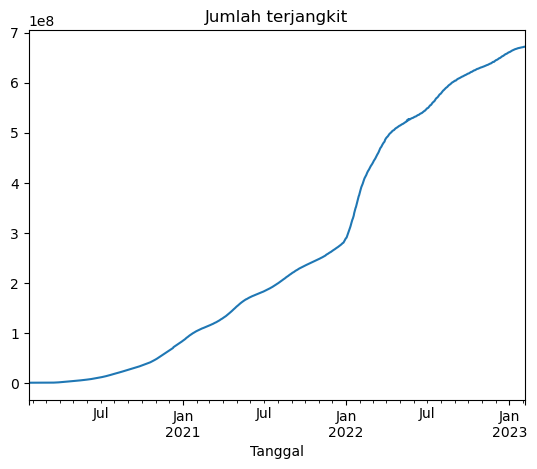

In [1203]:
# Visualisasi jumlah korban terjangkit dari waktu ke waktu
tanggal = covid_19.groupby(by='Tanggal')['Terjangkit'].sum()
tanggal.plot(title="Jumlah terjangkit")

<AxesSubplot: title={'center': '5 negara  paling banyak terjangkit'}, xlabel='Negara'>

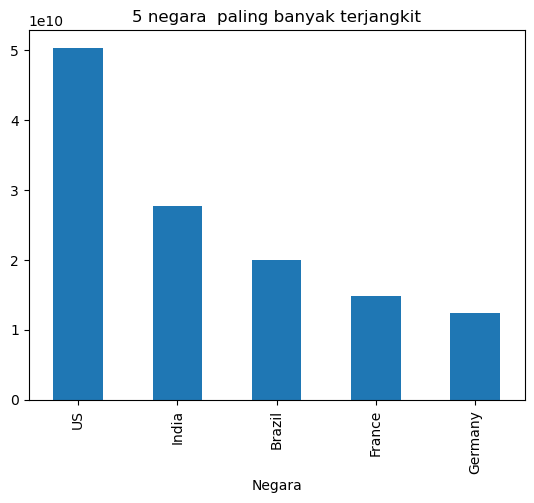

In [1204]:
# Visualisasi 5 negara dengan jumlah korban terjangkit terbesar
highest_country_confirmed['Terjangkit'].plot(title= '5 negara  paling banyak terjangkit', kind='bar')


<AxesSubplot: title={'center': '5 negara paling sedikit terjangkit'}, xlabel='Negara'>

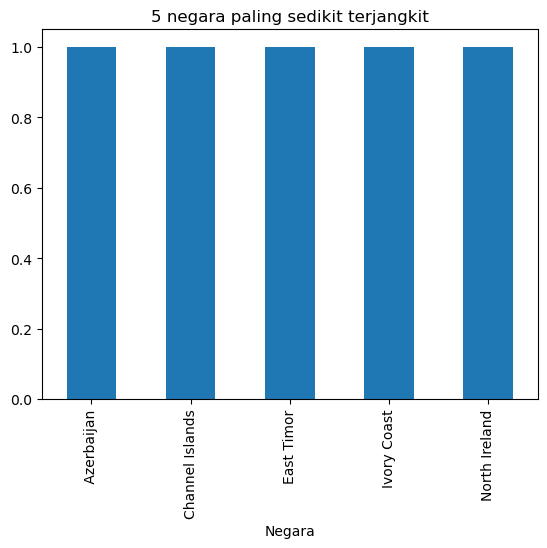

In [1205]:
# Visualisasi 5 negara dengan jumlah korban terjangkit terkecil
lowest_country_confirmed['Terjangkit'].plot(title='5 negara paling sedikit terjangkit', kind='bar')

<AxesSubplot: title={'center': '5 negara paling banyak meninggal'}, xlabel='Negara'>

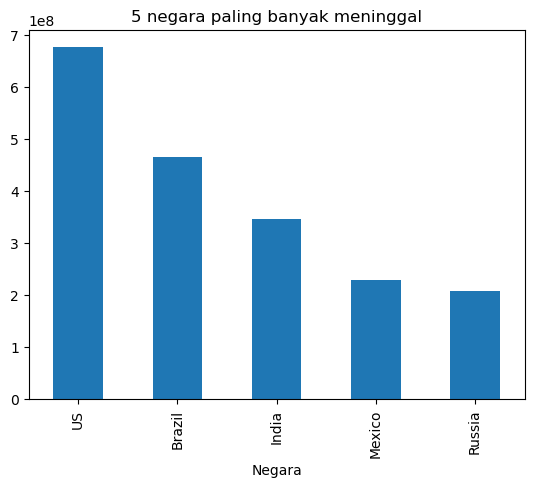

In [1206]:
# Visualisasi 5 negara dengan jumlah korban meninggal terbesar
highest_country_deaths['Meninggal'].plot(title='5 negara paling banyak meninggal', kind='bar')

<AxesSubplot: title={'center': '5 negara paling sedikit meninggal'}, xlabel='Negara'>

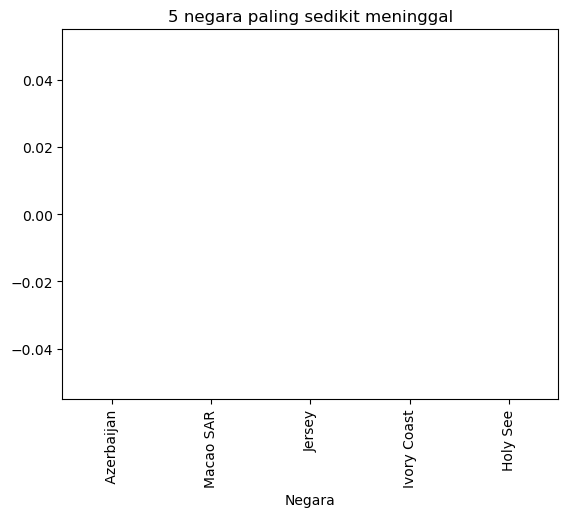

In [1207]:
# Visualisasi 5 negara dengan jumlah korban meninggal terkecil
lowest_country_deaths['Meninggal'].plot(title= '5 negara paling sedikit meninggal', kind='bar')

<AxesSubplot: title={'center': '5 negara paling banyak persentase meninggal'}, xlabel='Negara'>

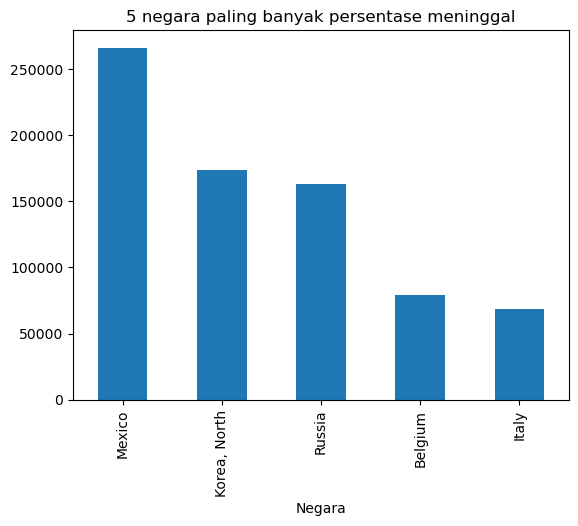

In [1208]:
# Visualisasi 5 negara dengan persentase meninggal terbesar
highest_country_percentage['Persen'].plot(title='5 negara paling banyak persentase meninggal', kind='bar')

<AxesSubplot: title={'center': '5 negara paling sedikit persentase meninggal'}, xlabel='Negara'>

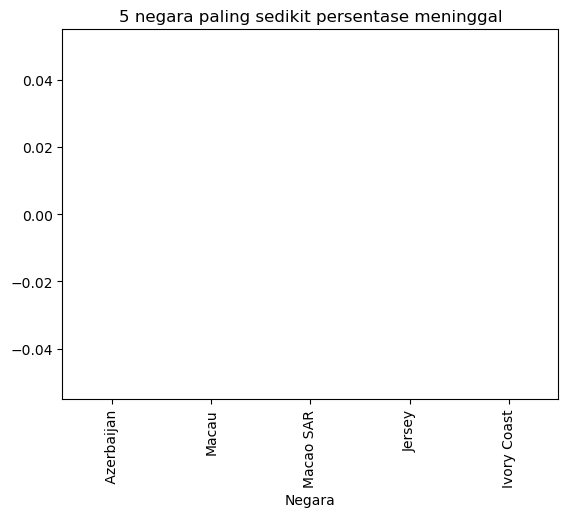

In [1209]:
# Visualisasi 5 negara dengan persentase meninggal terkecil
lowest_country_percentage['Persen'].plot(title='5 negara paling sedikit persentase meninggal', kind='bar')

# 6. Pengambilan Kesimpulan

Berdasarkan data yang ada, maka bisa disimpulkan bahwa :

1 . Jumlah korban terjangkit di semua negara adalah :

In [1210]:
total_confirmed

294318757313

2 . Jumlah korban meninggal di semua negara adalah :

In [1211]:
total_deaths

4149756286

3 . Persentase jumlah korban meninggal di semua negara adalah :

In [1212]:
total_deaths_percentage

1.41

4 . 5 Negara dengan jumlah terjangkit terbesar adalah :

In [1213]:
highest_country_confirmed.index

Index(['US', 'India', 'Brazil', 'France', 'Germany'], dtype='object', name='Negara')

5 . 5 negara dengan jumlah terjangkit terkecil adalah :

In [1214]:
lowest_country_confirmed.index

Index([' Azerbaijan', 'Channel Islands', 'East Timor', 'Ivory Coast',
       'North Ireland'],
      dtype='object', name='Negara')

6 . 5 negara dengan jumlah kematian terbesar adalah :

In [1215]:
highest_country_deaths.index

Index(['US', 'Brazil', 'India', 'Mexico', 'Russia'], dtype='object', name='Negara')

7 . 5 negara dengan jumlah kematian terkecil adalah :

In [1216]:
lowest_country_deaths.index

Index([' Azerbaijan', 'Macao SAR', 'Jersey', 'Ivory Coast', 'Holy See'], dtype='object', name='Negara')

8 . 5 Negara dengan persentase meninggal terbesar adalah :

In [1217]:
highest_country_percentage.index

Index(['Mexico', 'Korea, North', 'Russia', 'Belgium', 'Italy'], dtype='object', name='Negara')

9 . 5 Negara dengan persentase meninggal terkecil adalah :

In [1218]:
lowest_country_percentage.index

Index([' Azerbaijan', 'Macau', 'Macao SAR', 'Jersey', 'Ivory Coast'], dtype='object', name='Negara')